In [112]:
#Box 1: Setting up and running the SRIM calculation

import os

import numpy as np
import matplotlib.pyplot as plt

from srim import TRIM, Ion, Layer, Target
from srim.output import Results

E = 2.9e6
fluence = 99999 #number of ions used for simulation max 99 999


# Construct an ion, energy in eV
ion = Ion('H', energy=E) #9 MeV seem to be the maximum

# Construct a layer, displacement energy of in eV, density in gcm^-3
layer = Layer({
        'Fe': {
            'stoich': 68.995,
            'E_d': 40.0,
            'lattice': 0.0,
            'surface': 3.0
        },
        'C':{'stoich': 0.080,
            'E_d': 40.0,
            'lattice': 0.0,
            'surface': 3.0
        },
        'Mn':{'stoich': 2.000,
            'E_d': 40.0,
            'lattice': 0.0,
            'surface': 3.0
        },
        'P':{'stoich': 0.045,
            'E_d': 40.0,
            'lattice': 0.0,
            'surface': 3.0
        },
        'S':{'stoich': 0.030,
            'E_d': 40.0,
            'lattice': 0.0,
            'surface': 3.0
        },
        'Si':{'stoich': 0.750,
            'E_d': 40.0,
            'lattice': 0.0,
            'surface': 3.0
        },
        'Cr':{'stoich': 19.000,
            'E_d': 40.0,
            'lattice': 0.0,
            'surface': 3.0
        },
        'Ni':{'stoich': 9.000,
            'E_d': 40.0,
            'lattice': 0.0,
            'surface': 3.0
        },
        'N':{'stoich': 0.100,
            'E_d': 40.0,
            'lattice': 0.0,
            'surface': 3.0
        }}, density=8.0, width=2e7)

# Construct a target of a single layer of Nickel
target = Target([layer])

# Initialize a TRIM calculation
trim = TRIM(target, ion, number_ions=fluence, calculation=1) #will be changeg to 99 999 ions when the max energy value will be known

# Specify the directory of SRIM.exe
# For windows users the path will include C://...
srim_executable_directory = 'C:/Users/domin/OneDrive/Desktop/SRIM'

# takes about 10 seconds on my laptop
results = trim.run(srim_executable_directory)
# results is `srim.output.Results` and contains all output files parsed

output_directory = 'C:/Users/domin/OneDrive/Desktop/SRIM/tmp/srim_outputs'
os.makedirs(output_directory, exist_ok=True)
TRIM.copy_output_files('C:/Users/domin/OneDrive/Desktop/SRIM', output_directory)
folders = ['C:/Users/domin/OneDrive/Desktop/SRIM/tmp/srim_outputs']


In [113]:
#Box 2

from srim import output

def plot_damage_energy(folder, ax):
     results = Results(folder)
     phon = results.phonons # This data contains energy lost to phonons per Angstom per Ion
     dx = max(phon.depth) / 100.0 # To units of Angstroms
     energy_damage = (phon.ions + phon.recoils) * dx # This gives the damage energy in eV (?)
     ax.plot(phon.depth, energy_damage / phon.num_ions, label='{}'.format(folder))
     return sum(energy_damage) # Gives the damage energy imparted to the sample over the entire thickness.
"""
def plot_vacancies(folder, ax):
     results = Results(folder)
     vac = results.vacancy
     vacancy_depth = vac.knock_ons + np.sum(vac.vacancies, axis=1)
     ax.plot(vac.depth, vacancy_depth, label="Total vacancies at depth")
     return sum(vacancy_depth)
"""

'\ndef plot_vacancies(folder, ax):\n     results = Results(folder)\n     vac = results.vacancy\n     vacancy_depth = vac.knock_ons + np.sum(vac.vacancies, axis=1)\n     ax.plot(vac.depth, vacancy_depth, label="Total vacancies at depth")\n     return sum(vacancy_depth)\n'

Damage energy: 3006.3104 eV


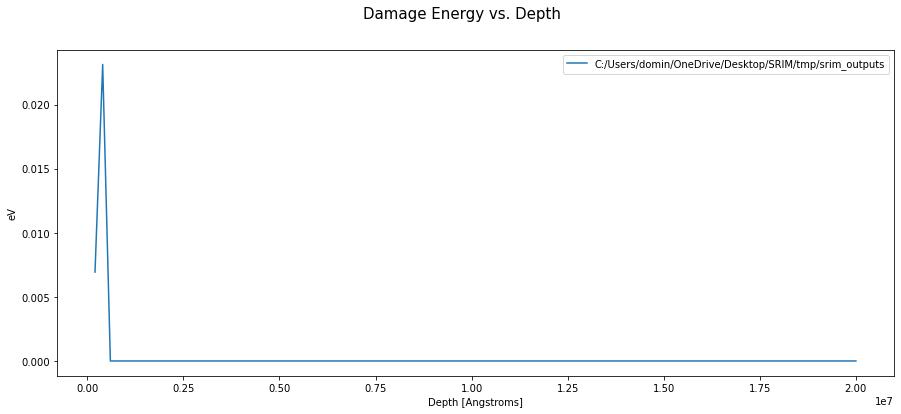

In [114]:
#Box 3: Plotting Damage Energy

# making a plot
fig, axes = plt.subplots(1, len(folders), sharex=True, sharey=True)

for ax, folder in zip(np.ravel(axes), folders):
    energy_damage = plot_damage_energy(folder, ax)
    print("Damage energy: {} eV".format(energy_damage))
    ax.set_xlabel('Depth [Angstroms]')
    ax.set_ylabel('eV')
    ax.legend()


fig.suptitle('Damage Energy vs. Depth', fontsize=15)
fig.set_size_inches((15, 6))


In [115]:
#Box 4: Calculating the irradiation time
# Getting displacment values
dpi = (0.8 * energy_damage)/(40) # as explained in On th euse of SRIM for computing radiation damage exposure.

# to get dpa
atom_density=8.751e22 #from SRIM
atoms = atom_density * V
#number of ions used in SRIM
dpa = (dpi * fluence)/(atoms)

#run time
required_dpa = 0.08 #going through that above, not done yet
cyclotron_flux = 9.37e13

time = (required_dpa*atoms)/(dpi*cyclotron_flux*3600) #in hours
irradiation_time = 12 #in hours
obtained_dpa = (irradiation_time*dpi*cyclotron_flux*3600)/(atoms)


print('dpa obtained after {} hours of irradiation at {}eV: {}'.format(irradiation_time, E, obtained_dpa))

dpa obtained after 12 hours of irradiation at 2900000.0eV: 0.8852778458044854
